# Αναγνώριση Προτύπων
## Μαυρογιαννάκης Κώστας 9789 , Τρίτη εργασία

# Πρώτο Μέρος

## Αρχικά κάνουμε import και install τις βιβλιοθήκες που θα χρειαστούμε

In [13]:
!pip install mlxtend

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.utils import resample

## Κάνουμε load τα δεδομένα και δημιουργούμε τα σύνολα που θα χρειαστούμε

In [25]:
#την ονομαζω iris για συντομια
iris=load_iris()
# για το Χ παίρνουμε τις 2 πρώτες στήλες μόνο (και όλες τις σειρές)
X=iris.data[:,:2]
Y=iris.target

# σπάμε το Χ στα 6 κομμάτια που θέλουμε ( τα υπόλοιπα 3 είναι παρακάτω)
setosa_train=X[:25,:]
versicolor_train=X[50:75,:]
virginica_train=X[100:125,:]

# τα 25 πρώτα από κάθε κλάση τα βάζουμε στο X_train με append διότι μου φάνηκε πιο εύκολο
# από το να ορίσω πρώτα πίνακα με 75 στοιχεία και με΄τά να τα αλλάζω
X_train=np.append(setosa_train,versicolor_train,axis=0) #axis=0 για να πάρει τα στοιχεία έτσι όπως τα θέλουμε
X_train=np.append(X_train,virginica_train,axis=0)

# τα υπόλοιπα 3 για test
setosa_test=X[25:50,:]
versicolor_test=X[75:100,:]
virginica_test=X[125:150,:]

# παρόμοια διαδικασία
X_test=np.append(setosa_test,versicolor_test,axis=0)
X_test=np.append(X_test,virginica_test,axis=0)

# θα ΄ήταν πιο εύκολο να κάνω απευθείας τον πίνακα καθώς οι τιμές είναι 25 0, 25 1, 25 2
#αλλά  έτσι είναι πιο γενικό
Y_train=Y[:25]
Y_train=np.append(Y_train,Y[50:75])
Y_train=np.append(Y_train,Y[100:125])

# test και train ίδια
Y_test=Y_train

## Ορίζουμε τον classifier που θα χρησιμοποιήσουμε και τον κάνουμε fit στα δεδομένα μας

Accuracy: 0.72 

              precision    recall  f1-score   support

      setosa       0.96      0.92      0.94        25
  versicolor       0.55      0.84      0.67        25
   virginica       0.77      0.40      0.53        25

    accuracy                           0.72        75
   macro avg       0.76      0.72      0.71        75
weighted avg       0.76      0.72      0.71        75



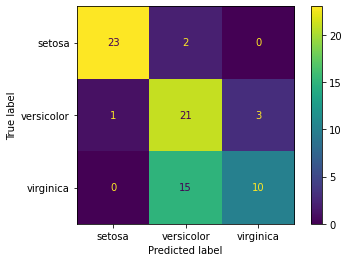

In [32]:
# random state 0 για ΄ίδια αποτελέσματα κάθε φορά που το τρέχουμε
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

# βλέπουμε αμέσως και το accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred),'\n')

# και το classification report για τις 3 κλάσεις
print(classification_report(Y_test, Y_pred,target_names=iris.target_names))

# confusion matrix
cm=confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['setosa','versicolor','virginica']).plot()
plt.show()

## Στον confusion matrix φαίνεται ότι δεν έχει γίνει καλή ταξινόμηση της virginica

## Με την βιβλιοθήκη mlxtend βλέπουμε εύκολα τις περιοχές

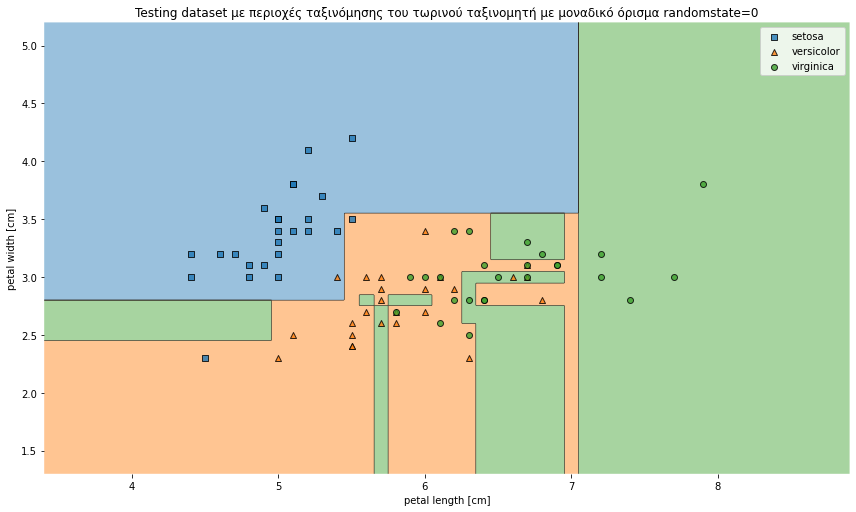

In [33]:
# το figsize αυτό στον υπολογιστή μου γεμίζει ακριβώς την οθόνη
fig, ax = plt.subplots(figsize=(12, 7))

# δίνουμε όρισμα στην συνάρτηση τα test set μας και τον ταξινομητή και μας δίνει το επιθυμητό plot
plot_decision_regions(X_test,Y_test, clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Testing dataset με περιοχές ταξινόμησης του τωρινού ταξινομητή με μοναδικό όρισμα randomstate=0')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'], scatterpoints=1)
plt.show()

## Καθώς ο classifier μας δεν είχε όρισμα στο βάθος πήρε αυτόματα την τιμή 11. Τώρα θα τον τρέξουμε για βάθη από 1 μέχρι 11 για να δούμε ποιό θα δώσει καλύτερα αποτελέσματα

In [34]:
# παίρνουμε το βάθος που έχει επιλέξει
a=clf.get_depth()

#αρχικοποιούμε μεταβλητές που θα χρειαστούν
max=0
best_depth=0

for i in range(1,a+1): # βάθος 1 εώς 11
    clf = DecisionTreeClassifier(random_state=0,max_depth=i)
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy=metrics.accuracy_score(Y_test, Y_pred)
    # κάνουμε print το accuracy σε κάθε βάθος
    print("Accuracy with depth",i, ":",accuracy)
    # αν το τωρινό accuracy είναι το καλύτερο το θέτουμε μέγιστο και παίρνουμε και το βάθος
    if (accuracy>max):
        max=accuracy
        best_depth=i

Accuracy with depth 1 : 0.64
Accuracy with depth 2 : 0.68
Accuracy with depth 3 : 0.6933333333333334
Accuracy with depth 4 : 0.8
Accuracy with depth 5 : 0.8
Accuracy with depth 6 : 0.8
Accuracy with depth 7 : 0.68
Accuracy with depth 8 : 0.7066666666666667
Accuracy with depth 9 : 0.68
Accuracy with depth 10 : 0.72
Accuracy with depth 11 : 0.72


## Βλέπουμε ότι τα βάθη 4,5,6 δίνουν το ίδιο accuracy. Θα κρατήσουμε το 4.

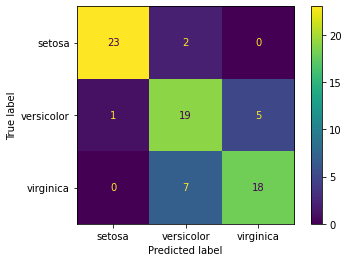

In [35]:
# έχουμε κρατήσει το καλύτερο βάθος οπότε ορίζουμε ξανά τον classifier καθώς αυτός που έχουμε τώρα
# είναι αυτός της τελευταίας επανάληψης, δηλαδή με βάθος 11
clf = DecisionTreeClassifier(random_state=0,max_depth=best_depth)
clf = clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['setosa','versicolor','virginica']).plot()

plt.show()

## Καλύτερη ταξινόμηση από πριν

## Οπτικοποιούμε πάλι τις περιοχές

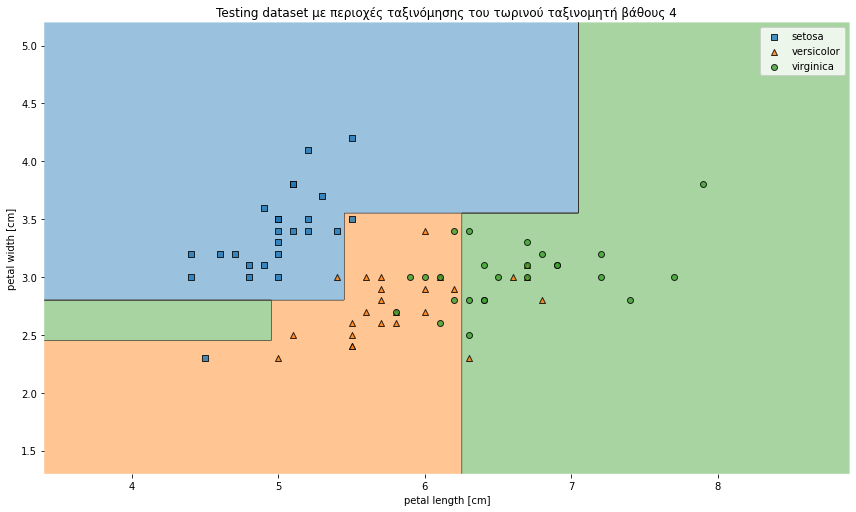

In [36]:
fig, ax = plt.subplots(figsize=(12, 7))
plot_decision_regions(X_test,Y_test, clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
plt.title('Testing dataset με περιοχές ταξινόμησης του τωρινού ταξινομητή βάθους 4')
ax.legend(handles, ['setosa', 'versicolor', 'virginica'], scatterpoints=1)
plt.show()

## Με βάθος 4 έχουμε καλύτερο αποτέλεσμα σε σχέση με βάθος 11. Βλέπουμε όμως ότι ένα κομμάτι των περιοχών αποφάσεων που φαίνεται να ανήκει στην setosa έχει ταξινομηθεί στην virginica, έχει γίνει δηλαδή overfit ο classifier στο training set. Η περιοχή που αναφέρομαι είναι η x<4.9 και 2.4<y<2.8 . Αν μάλιστα δούμε ολόκληρο το dataset με τα 150 στοιχεία παρατηρούμε ότι υπάρχει μόνο 1 στοιχείο της virginica σε αυτή τη περιοχή ενώ περικλύεται από στοιχεία των setosa και versicolor.

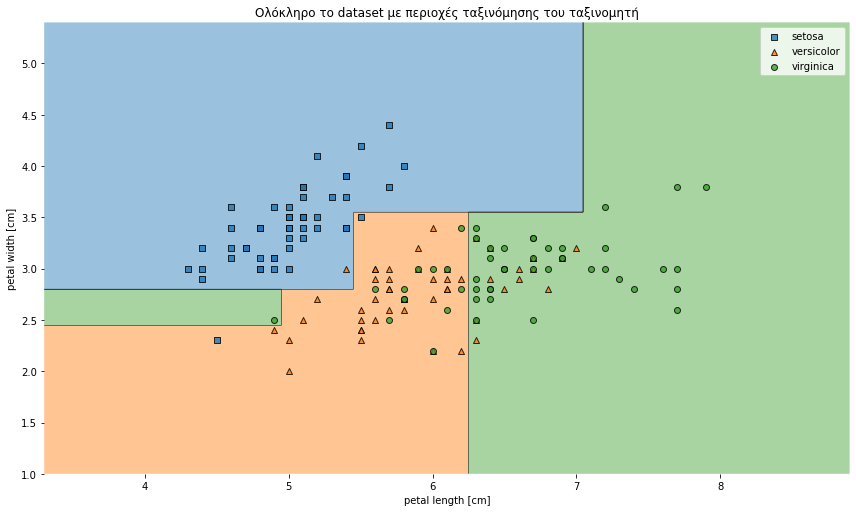

In [37]:
fig, ax = plt.subplots(figsize=(12, 7))
plot_decision_regions(X,Y, clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Ολόκληρο το dataset με περιοχές ταξινόμησης του ταξινομητή')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'], scatterpoints=1)
plt.show()

# Δεύτερο Μέρος

## Θα τρέξουμε ένα loop με διαφορετικό test set στην κάθε επανάληψη και θα κρατήσουμε τον ταξινομητή με το μεγαλύτερο accuracy. Θα επαναλάβουμε αυτή τη διαδικασία για βάθη 3 εως 10.

In [38]:
# max accuracy αρχικοποίηση
max=0
# γ ως μεταβλητή για να τα αλλάζω απ'ευθείας από εδώ
gamma=0.5
# για να αποθηκεύσουμε το accuracy σε κάθε επανάληψη ορίζω αυτόν τον πίνακα
accuracy_array=np.zeros((8,100))

# διπλό loop ένα για το βάθος και το άλλο για τα 100 σύνολα
for depth in range(3,11):
    for i in range (0,100):
        # τα βάζω μαζί ώστε το resample να παίρνει το ζευγάρι και όχι μόνο τα Χ
        # καθώς μόνο με τα Χ δεν θα μπορούσα να προχωρήσω
        XY_train=np.column_stack((X_train,Y_train))
        # bootstrap resampling από το αρχικό μας test set παίρνω ένα ποσοστό δειγμάτων ανάλογα με το γ
        # int() γιατι δεν μπορουμε να εχουμε δεκαδικο αριθμό δειγμάτων
        XY_resample= resample(XY_train,n_samples=int(XY_train.shape[0]*gamma) )
        # χωρίζω X και Υ
        Y_train_new=XY_resample[:,2]
        X_train_new=XY_resample[:,:2]
        # classifier με το βάθος που όρισα
        clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
        clf = clf.fit(X_train_new,Y_train_new)
        # θα μπορούσα και απ'έξω καθώς υπήρχε ήδη ένας clf
        # άλλα έτσι είναι πιο γενικό
        if (i==0 and depth==3):
            best_clf=clf
        Y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(Y_test, Y_pred)
        # αποθηκεύω το accuracy στην τωρινή επανάληψη
        # depth-3 διότι το βάθος 3 αντιστοιχεί στο πρώτο στοιχείο κλπ.
        accuracy_array[depth-3,i]=acc
        # αν είναι μεγαλύτερο από τα προηγούμενα το θέτω μέγιστο και κρατάω τον καλύτερο ταξινομητή
        if (acc>max):
            max=acc
            best_clf=clf
            best_depth=depth

In [39]:
print('The best depth is' , best_depth,
    '.\nMax accuracy:', accuracy_array[best_depth-3,:].max(),
    '\nMin accuracy:',accuracy_array[best_depth-3,:].min(),'\nMean accuracy:', accuracy_array[best_depth-3,:].mean())

The best depth is 5 .
Max accuracy: 0.8266666666666667 
Min accuracy: 0.4666666666666667 
Mean accuracy: 0.6833333333333332


## Με το random forest έχουμε μέσα αποτελέσματα χειρότερα από την προηγούμενη μέθοδο, τρέχοντας το όμως αρκετές φορές μπορούμε να καταφέρουμε λίγο μεγαλύτερο accuracy.

Accuracy: 0.8266666666666667


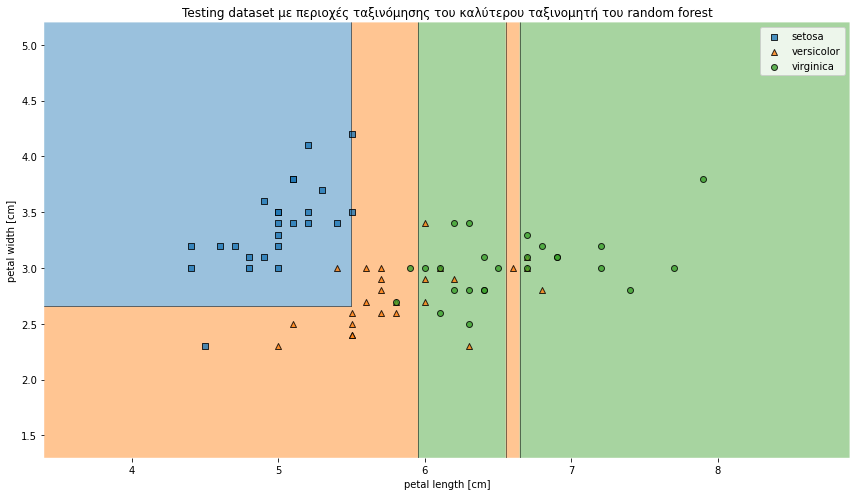

In [42]:
# εδώ πρέπει να αναφέρω ότι κάποιες φορές ενώ το καλύτερο βάθος έβγαινε 9 ή 10 στο plot φαίνονται πολύ λιγότερες περιοχές
Y_pred = best_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
fig, ax = plt.subplots(figsize=(12, 7))
plot_decision_regions(X_test,Y_test, best_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.title('Testing dataset με περιοχές ταξινόμησης του καλύτερου ταξινομητή του random forest')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'], scatterpoints=1)
plt.tight_layout()
plt.show()

## Το πρώτο πράγμα που παρατηρώ είναι ότι δεν είναι πλέον το κάτω αριστερά κομμάτι ταξινομημένο στην virginica. Έχουμε αποφύγει δηλαδή αυτό το overfitting. Δεν μπορώ να βγάλω όμως κάποιο άλλο πόρισμα καθώς ο αλγόριθμος κάθε φορά που τρέχει έχει εντελώς διαφορετικό αποτέλεσμα σε σχέση με πριν. Κάθε φορά που το τρέχω καταλήγει σε διαφορετικό βάθος και οι περιοχές απόφασεις διαφέρουν.

## Αυξάνοντας το γ και τρέχοντας αρκετές φορές τον αλγόριθμο αυτή η περιοχή εμφανίζεται ξανά στον καλύτερο ταξινομητή. Έτσι καταλαβαίνουμε ότι αυξάνοντας το γ πηγαίνουμε πλησιέστερα στο αρχικό dataset οπότε τα φαινόμενα overfitting γίνονται πάλι αντιληπτά.

## Για να είναι πιο ολοκληρωμένη η παρουσιάση θα συμπεριλάβω και ένα παράδειγμα με μεγαλύτερο γ αλλά αν το τρέξετε ο ίδιος κατά πάσα πιθανότητα να μην φανεί αυτό που θέλω να δείξω. Στο από κάτω plot το διάστημα αυτό υπάρχει πάλι ταξινομημένο στην virginica, αλλά τουλάχιστον είναι μικρότερο.

The best depth is 5 .
Max accuracy: 0.8266666666666667 
Min accuracy: 0.52 
Mean accuracy: 0.7010666666666668


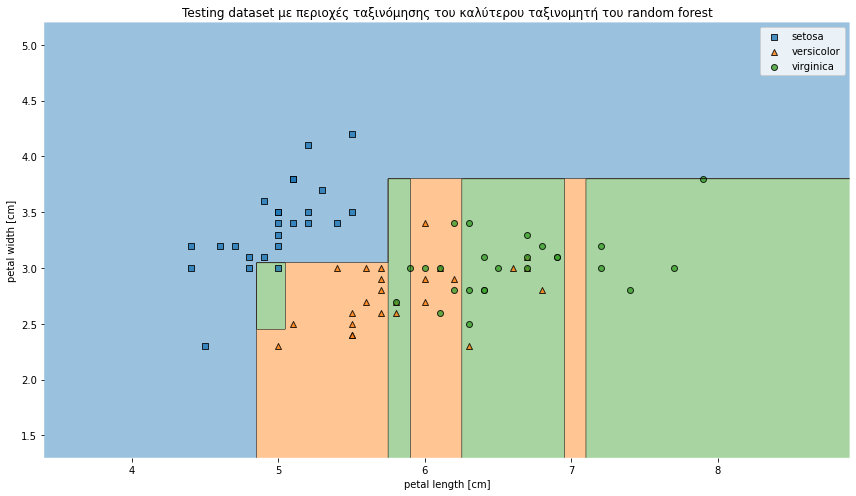

In [66]:
max=0
gamma=0.9
accuracy_array=np.zeros((8,100))

for depth in range(3,11):
    for i in range (0,100):
        XY_train=np.column_stack((X_train,Y_train))
        XY_resample= resample(XY_train,n_samples=int(XY_train.shape[0]*gamma) )
        Y_train_new=XY_resample[:,2]
        X_train_new=XY_resample[:,:2]
        clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
        clf = clf.fit(X_train_new,Y_train_new)
        if (i==0 and depth==3):
            best_clf=clf
        Y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(Y_test, Y_pred)
        accuracy_array[depth-3,i]=acc
        if (acc>max):
            max=acc
            best_clf=clf
            best_depth=depth
print('The best depth is' , best_depth,
    '.\nMax accuracy:', accuracy_array[best_depth-3,:].max(),
    '\nMin accuracy:',accuracy_array[best_depth-3,:].min(),'\nMean accuracy:', accuracy_array[best_depth-3,:].mean())

Y_pred = best_clf.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 7))
plot_decision_regions(X_test,Y_test, best_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.title('Testing dataset με περιοχές ταξινόμησης του καλύτερου ταξινομητή του random forest')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'], scatterpoints=1)
plt.tight_layout()
plt.show()